Importing Libraries

In [37]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

About Dataset


Context

About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:

Sales -- Unit sales (in thousands) at each location

Competitor Price -- Price charged by competitor at each location

Income -- Community income level (in thousands of dollars)

Advertising -- Local advertising budget for company at each location (in thousands of dollars)

Population -- Population size in region (in thousands)

Price -- Price company charges for car seats at each site

Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

Age -- Average age of the local population

Education -- Education level at each location

Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [38]:
company=pd.read_csv('/content/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Data Exploration

In [39]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [40]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

 Descriptive Analysis

In [41]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [42]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [43]:
!pip install category_encoders

import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
sales1=encoder.fit_transform(company)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 Feature Engineering

In [44]:
company['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

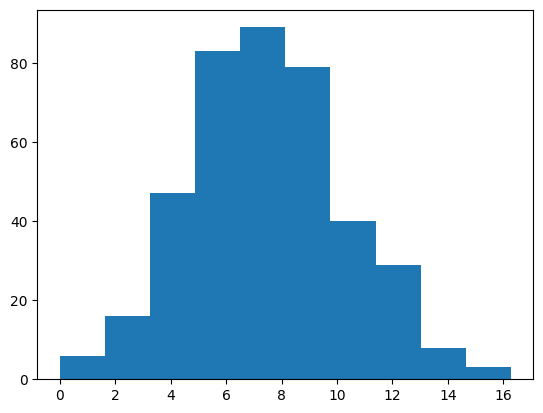

In [45]:
plt.hist('Sales', data=company)
plt.show()

As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”

In [46]:
sales_val = []
for value in company["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [47]:
sales1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [48]:
x=sales1.drop(['sales_val','Sales'],axis=1)
y=sales1['sales_val']

In [49]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [50]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [51]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [52]:
#spilliting data into training and testing data set
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=10)

In [53]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [54]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
303,133,52,16,290,99,3,43,11,1,1
349,134,27,18,467,96,3,49,14,2,1
149,121,120,13,140,87,3,56,11,1,1
100,113,69,11,94,106,3,76,12,2,1
175,115,89,0,38,122,3,25,12,1,2
...,...,...,...,...,...,...,...,...,...,...
369,135,100,22,463,122,3,36,14,1,1
320,136,70,12,171,152,3,44,18,1,1
15,149,95,5,400,144,3,76,18,2,2
125,89,78,0,181,49,3,43,15,2,2


In [55]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
332,106,33,20,354,104,3,61,12,1,1
111,132,118,12,272,151,3,43,14,1,1
352,133,103,14,288,122,2,61,17,1,1
205,113,22,1,317,132,3,28,12,1,2
56,133,82,0,54,84,3,50,17,1,2
...,...,...,...,...,...,...,...,...,...,...
304,123,98,12,408,134,2,29,10,1,1
187,117,32,0,142,96,1,62,17,1,2
166,119,67,17,151,137,3,55,11,1,1
64,100,67,12,184,104,3,32,16,2,1


In [56]:
y_train

303    high
349    high
149    high
100     low
175    high
       ... 
369    high
320     low
15     high
125    high
265     low
Name: sales_val, Length: 320, dtype: object

In [57]:

y_test

332     low
111     low
352    high
205     low
56     high
       ... 
304    high
187     low
166     low
64     high
27      low
Name: sales_val, Length: 80, dtype: object

In [58]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

high    44
low     36
dtype: int64

In [60]:
preds

array(['low', 'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'low', 'high', 'low', 'low', 'high',
       'high', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'high', 'high', 'high', 'low', 'low', 'high',
       'low', 'low'], dtype=object)

In [61]:
pd.crosstab(y_test,preds)

col_0,high,low
sales_val,,
high,23,9
low,21,27


In [62]:
#accuracy
np.mean(preds==y_test)

0.625

Classification report

In [63]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        high       0.72      0.52      0.61        44
         low       0.56      0.75      0.64        36

    accuracy                           0.62        80
   macro avg       0.64      0.64      0.62        80
weighted avg       0.65      0.62      0.62        80



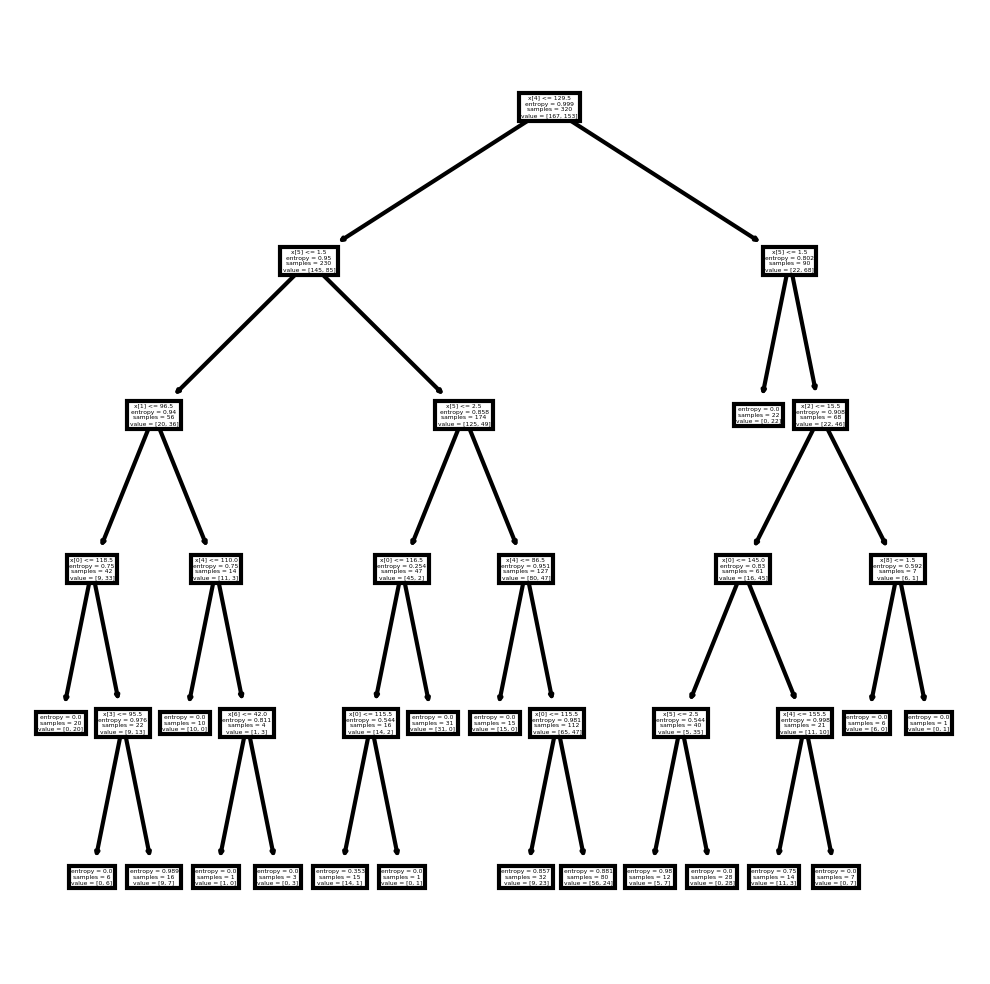

In [64]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#Plot the decision tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy')

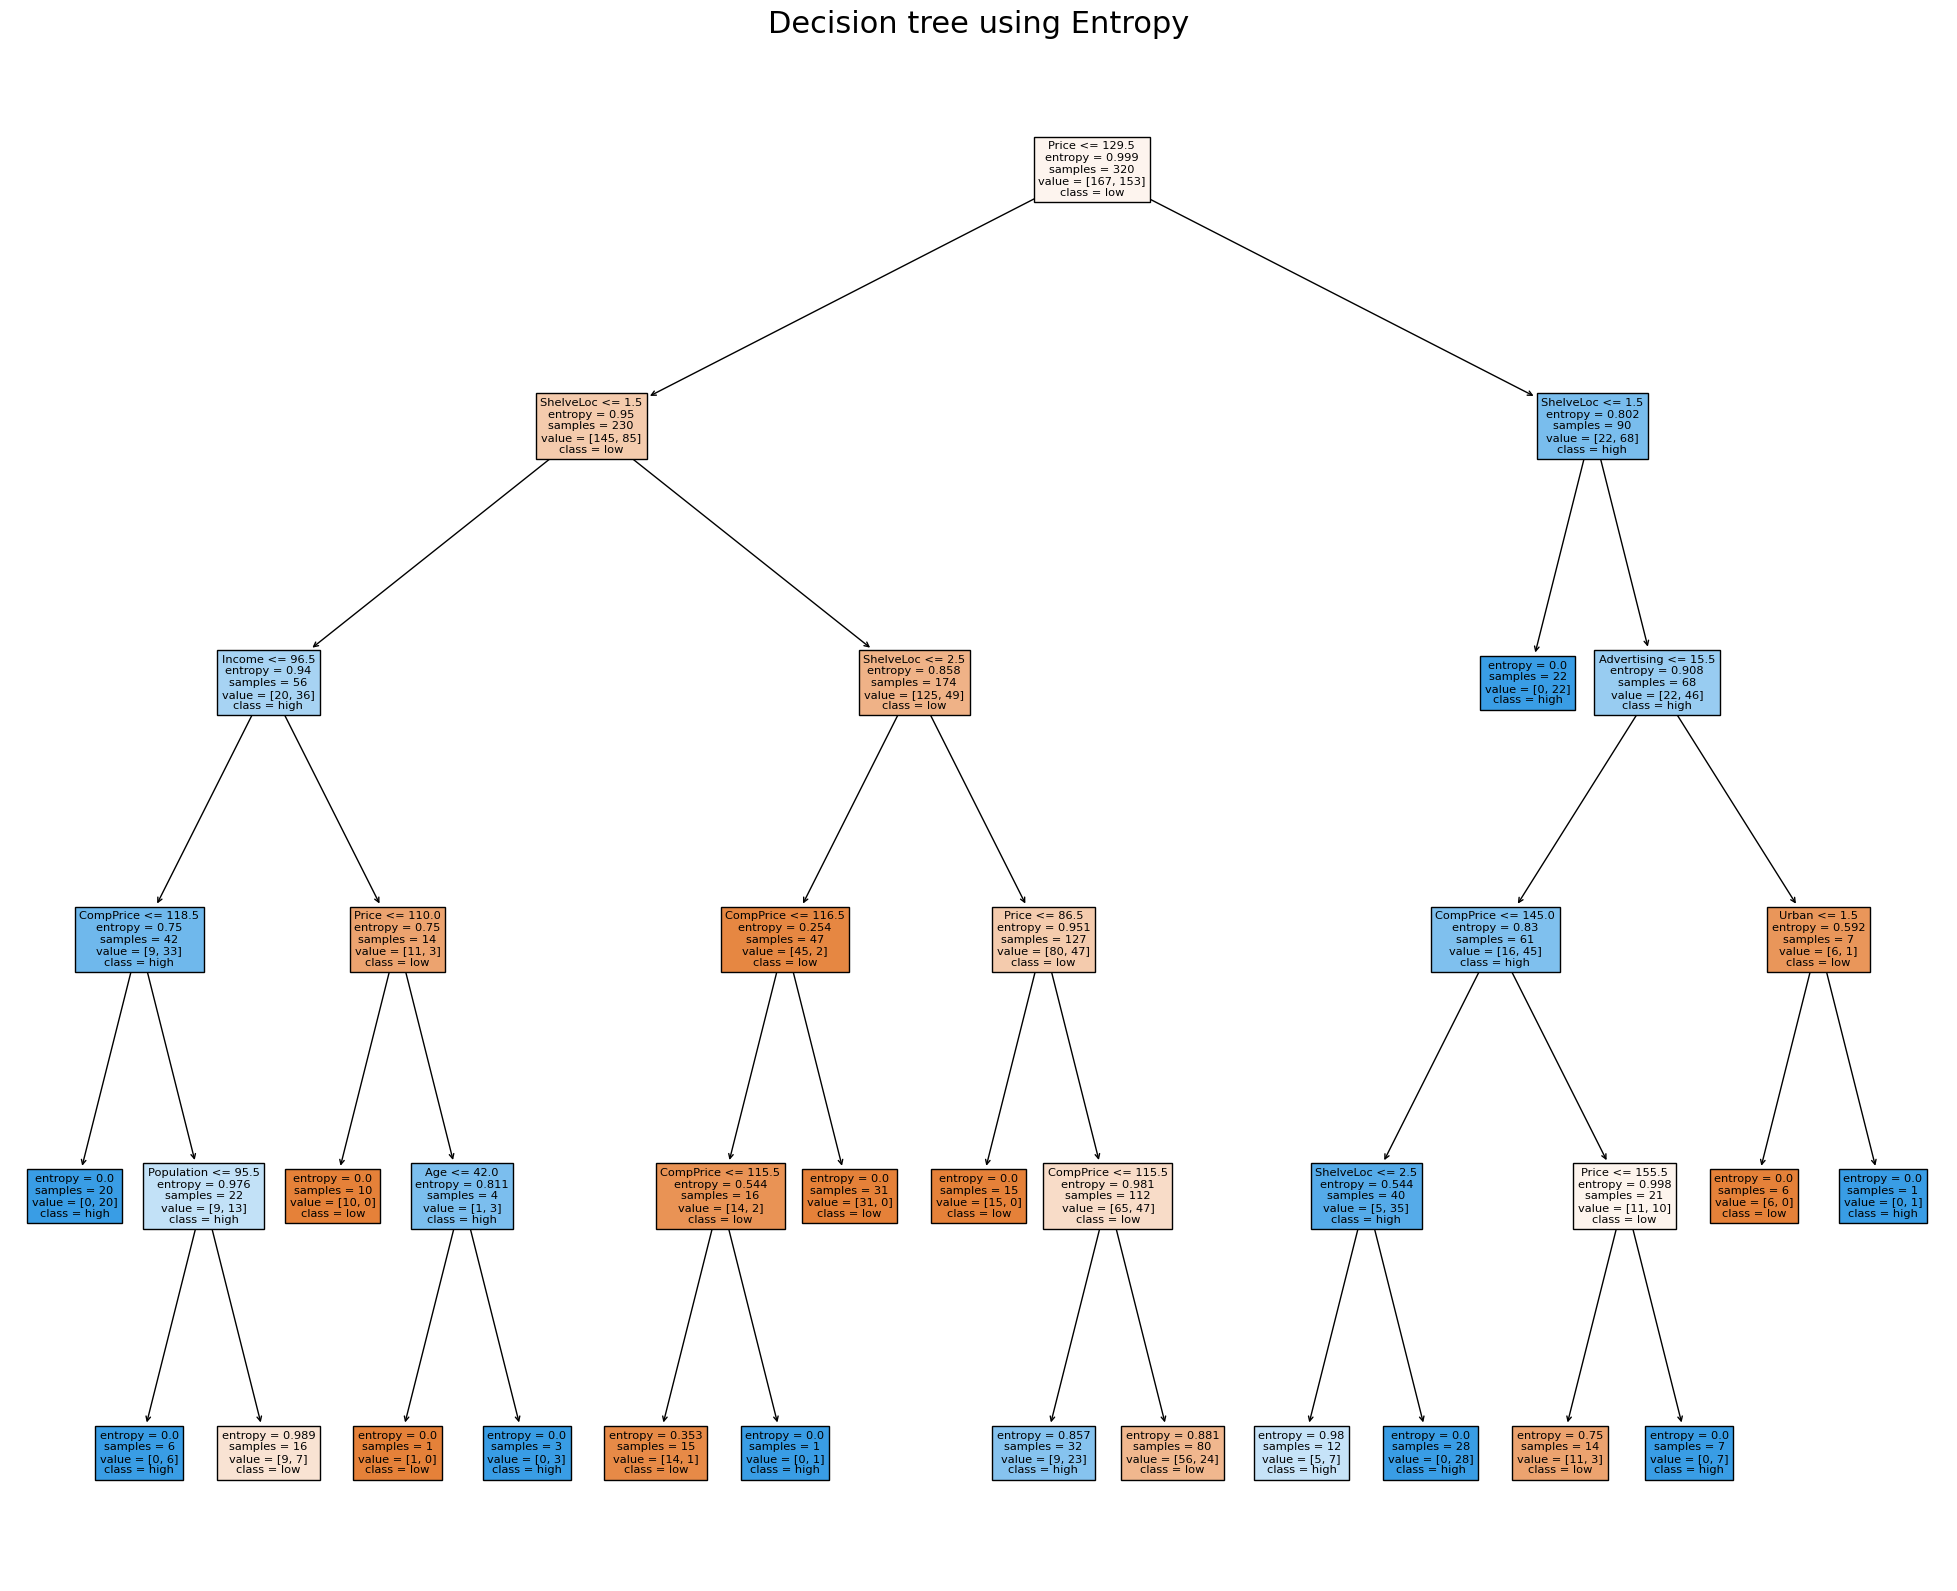

In [65]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

Building Decision Tree Classifier (CART) using Gini Criteria

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [67]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6375

Text(0.5, 1.0, 'Decision tree using Entropy')

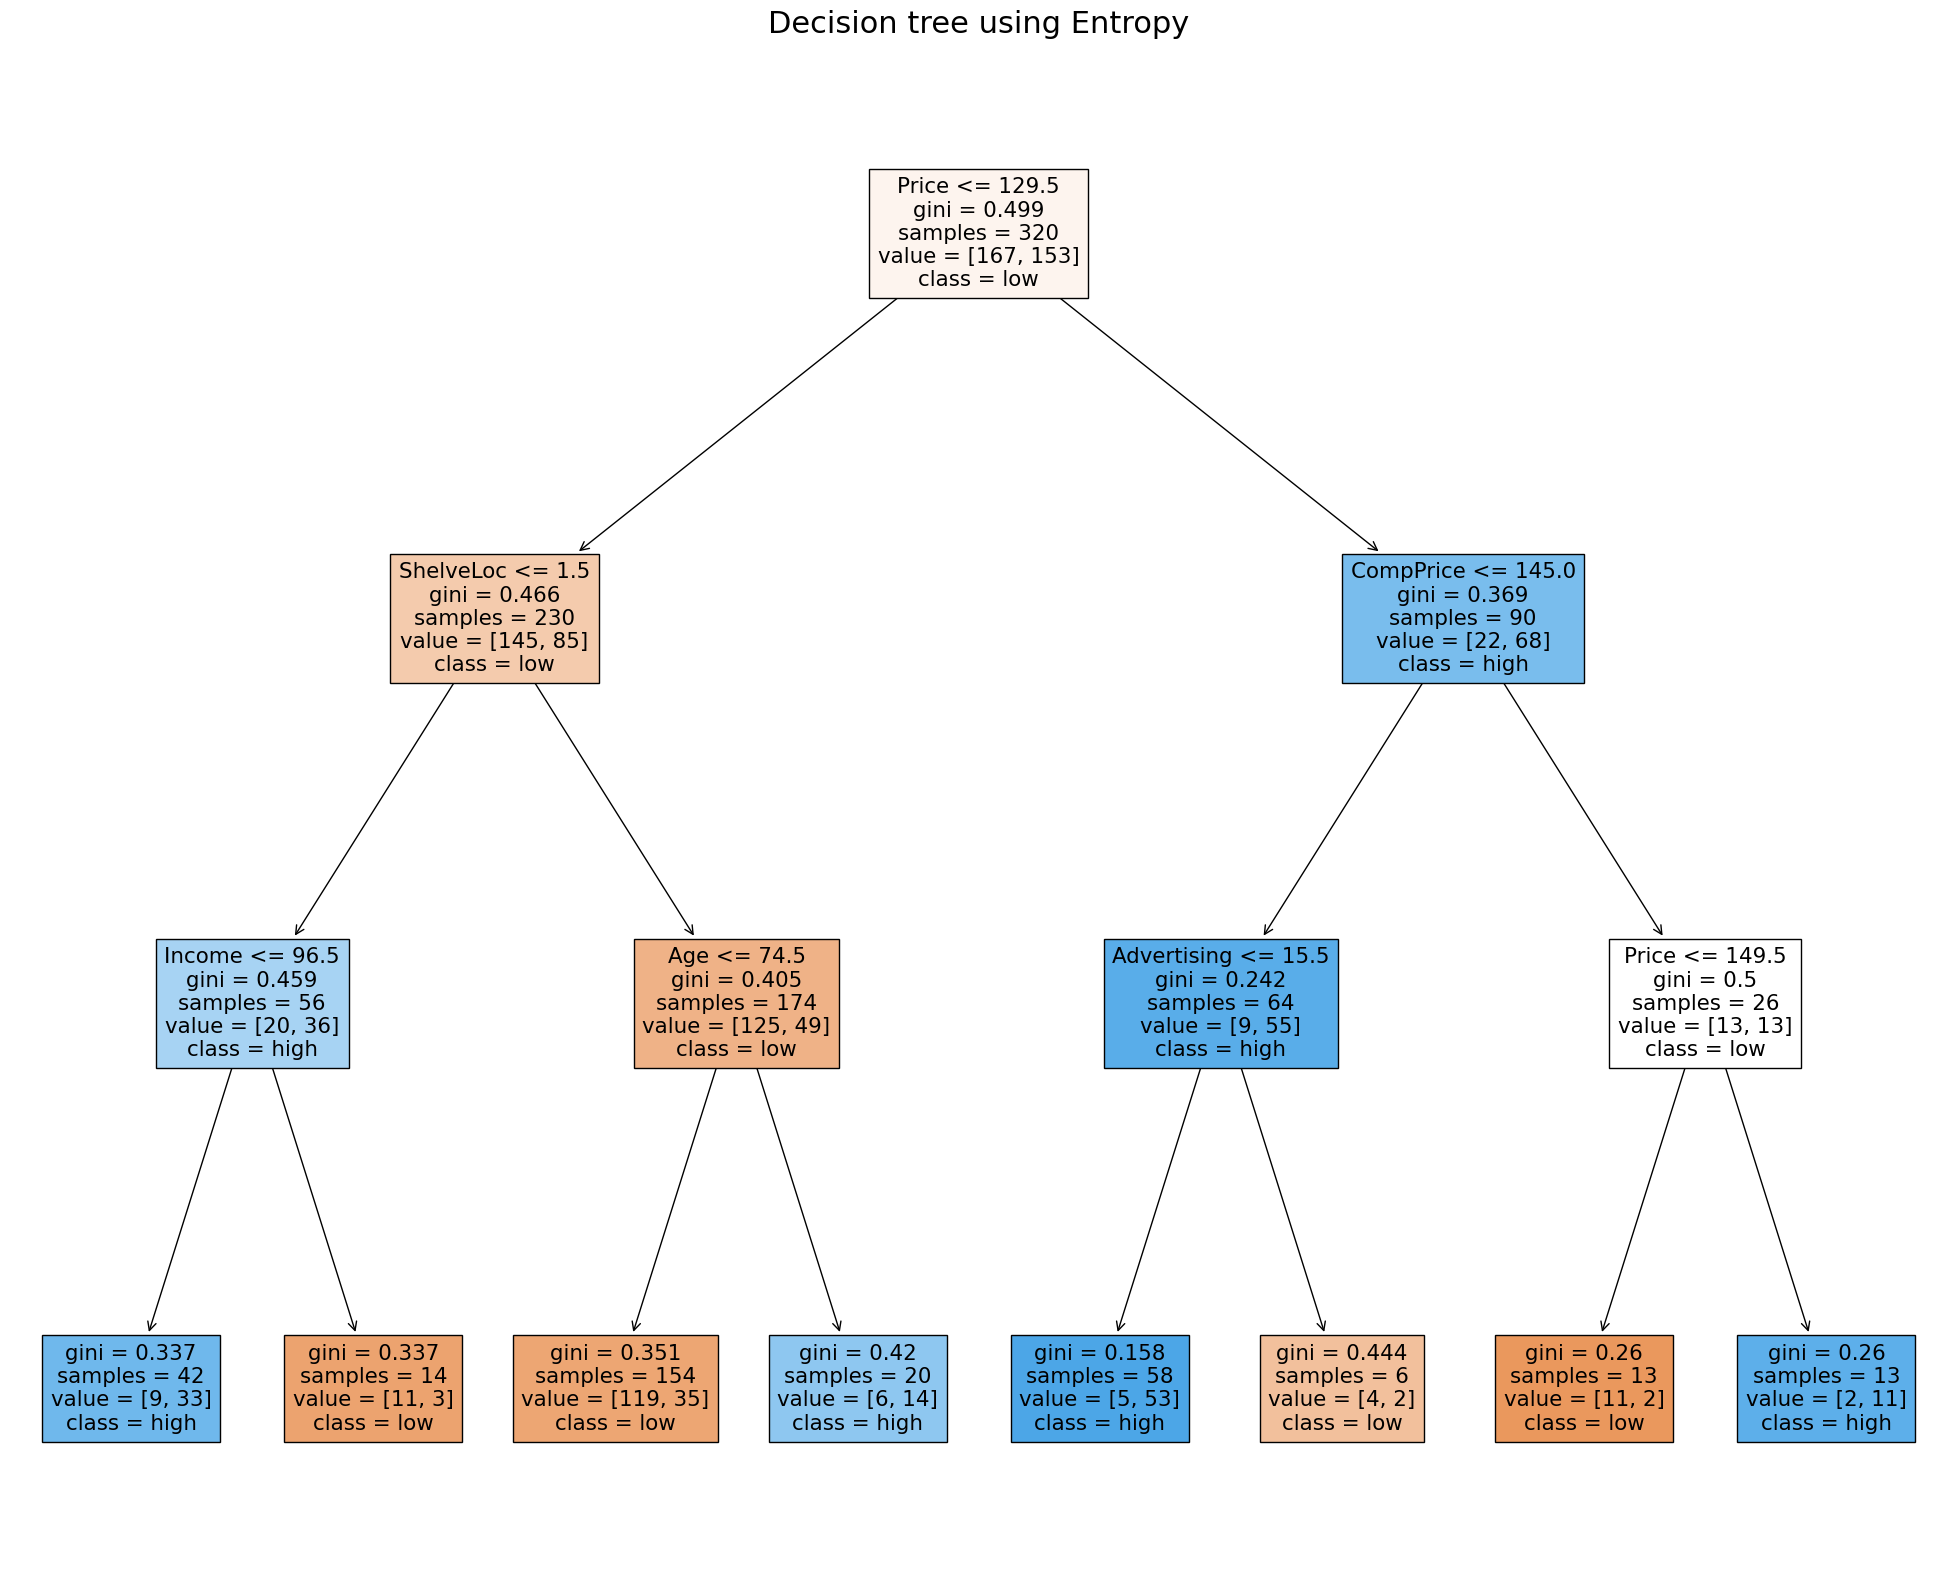

In [69]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)